In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from myModels.knn import KNNModel
from myModels.logistic_regrassion import LogisticRegrassion
from myModels.svm import SVM
from myModels.naive_bayes import NaiveBayes
from myModels.linear_regression import LinearRegression
from myModels.k_means import KMeans
from myModels.pca import PCA
from myModels.perceptron import Perceptron
from sklearn.metrics import classification_report

names = [
    'fLength',
    'fWidth',
    'fSize',
    'fConc',
    'fConc1',
    'fAsym',
    'fM3Long',
    'fM3Trans',
    'fAlpha',
    'fDist',
    'class'
]

df = pd.read_csv('magic04.data', names=names)
df['class'] = (df['class'] == 'g').astype(int)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


In [2]:
train, test = np.split(df.sample(frac=1), [int(0.8 * len(df)), ])

def scaledataset(dataframe, oversample = False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X, y = ros.fit_resample(X, y) # type: ignore

    data = np.hstack((X, np.reshape(y, (-1, 1))))

    return data, X, y

In [3]:
train, X_train, y_train = scaledataset(train, oversample=True)
test, X_test, y_test = scaledataset(test, oversample=False)

In [4]:
# knn_model = KNNModel(k=3)
# knn_model.fit(X_train, y_train)


In [5]:
# y_pred = knn_model.predict(X_test)
# print(classification_report(y_test, y_pred))

In [6]:
lg_model = LogisticRegrassion(lr=0.005)
lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      0.77      0.70      1336
           1       0.86      0.77      0.81      2468

    accuracy                           0.77      3804
   macro avg       0.75      0.77      0.76      3804
weighted avg       0.79      0.77      0.77      3804



In [7]:
svm_model = SVM()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.58      0.62      0.60      1336
           1       0.79      0.76      0.77      2468

    accuracy                           0.71      3804
   macro avg       0.68      0.69      0.69      3804
weighted avg       0.71      0.71      0.71      3804



In [8]:
prob_model = NaiveBayes()
prob_model.fit(X_train, y_train)
y_pred = prob_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.42      0.52      1336
           1       0.74      0.90      0.81      2468

    accuracy                           0.73      3804
   macro avg       0.71      0.66      0.66      3804
weighted avg       0.72      0.73      0.71      3804



In [9]:
# for label in df.columns[1:]:
#     plt.scatter(df[label], df['fLength'])
#     plt.title(label)
#     plt.ylabel('fLength')
#     plt.xlabel(label)
#     plt.show()

df_for_regrassion = df[['fAlpha', 'fDist', 'fLength']]
df_for_regrassion.head()

,fAlpha,fDist,fLength
0,40.0920,81.8828,28.7967
1,6.3609,205.2610,31.6036
2,76.9600,256.7880,162.0520
3,10.4490,116.7370,23.8172
4,4.6480,356.4620,75.1362


In [10]:
import copy
from sklearn.linear_model import LinearRegression as SKLinearRegression

train, test = np.split(df_for_regrassion.sample(frac=1), [int(0.8 * len(df_for_regrassion)), ])

def get_xy(dataframe, y_label, x_label = None):
    dataframe = copy.deepcopy(dataframe)
    if x_label is None:
        X = dataframe[
              [c for c in dataframe.columns if c != y_label]
            ].values
    elif len(x_label) == 1:
        X = dataframe[x_label[0]].values.reshape(-1, 1)
    else:
        X = dataframe[x_label].values

    y = dataframe[y_label].values
    data = np.hstack((X, y.reshape(-1, 1)))

    return data, X, y

_, X_train_1Param, y_train_1Param = get_xy(train, 'fDist', ['fLength'])
_, X_test_1Param, y_test_1Param = get_xy(test, 'fDist', ['fLength'])


oneParam_reg = SKLinearRegression()
oneParam_reg.fit(X_train_1Param, y_train_1Param)
oneParam_reg.score(X_test_1Param, y_test_1Param)

0.18242650675879946

In [11]:
_, X_train_all, y_train_all = get_xy(train, 'fDist', ['fAlpha', 'fLength'])
_, X_test_all, y_test_all = get_xy(test, 'fDist', ['fAlpha', 'fLength'])

all_reg = SKLinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all)

0.23408737598925333

In [12]:
def MSE(y_pred, y_real):
    return (np.square(y_pred - y_real)).mean()

In [13]:
oneParam_reg = LinearRegression()
oneParam_reg.fit(X_train_1Param, y_train_1Param)
oneParam_reg.score(X_test_1Param, y_test_1Param)

0.18288556132192713

In [14]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)
all_reg.score(X_test_all, y_test_all)

0.23414702531549714

In [15]:
y_pred = oneParam_reg.predict(X_test_1Param)
MSE(y_pred, y_test_1Param)

4482.770318633278

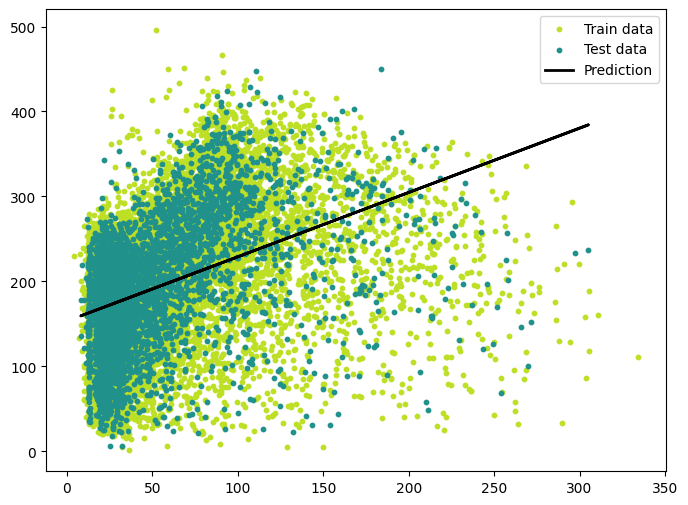

In [16]:
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(X_train_1Param, y_train_1Param, color=cmap(0.9), s=10, label="Train data")
m2 = plt.scatter(X_test_1Param, y_test_1Param, color=cmap(0.5), s=10, label="Test data")
plt.plot(X_test_1Param, y_pred, color='black', linewidth=2, label='Prediction')
plt.legend()
plt.show()

In [17]:
cols = ["area", "perimeter", "compactness", "length", "width", "asymmetry", "groove", "class"]

df_for_kmeans = pd.read_csv('seeds_dataset.txt', names=cols, sep="\s+")

In [18]:
import seaborn as sns

x1 = 'compactness'
x2 = 'asymmetry'

X = df_for_kmeans[[x1, x2]].values
labels = KMeans(k=3).fit(X)

[]

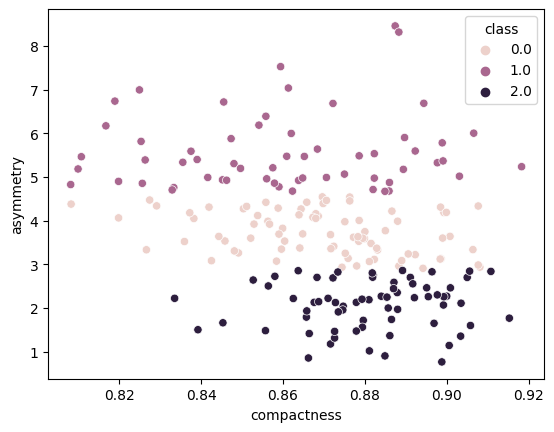

In [19]:
cluster_df = pd.DataFrame(np.hstack((X, labels.reshape(-1, 1))), columns=[x1, x2, 'class'])

sns.scatterplot(x=x1, y=x2, hue='class', data=cluster_df)
plt.plot()

[]

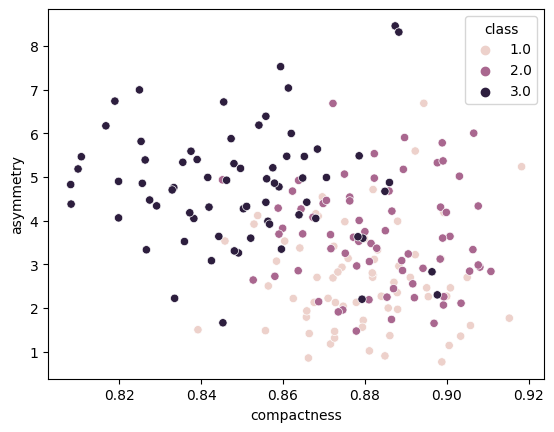

In [20]:
truth_df = pd.DataFrame(np.hstack((X, df_for_kmeans['class'].values.reshape(-1, 1))), columns=[x1, x2, 'class'])

sns.scatterplot(x=x1, y=x2, hue='class', data=truth_df)
plt.plot()

[]

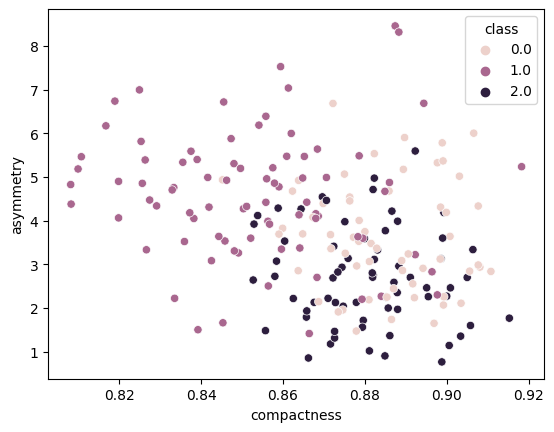

In [21]:
X = df_for_kmeans[cols[:-1]].values
y = df_for_kmeans['class'].values
labels = KMeans(k=3).fit(X)
cluster_df = pd.DataFrame(np.hstack((X, labels.reshape(-1, 1))), columns=df_for_kmeans.columns)
sns.scatterplot(x=x1, y=x2, hue='class', data=cluster_df)
plt.plot()

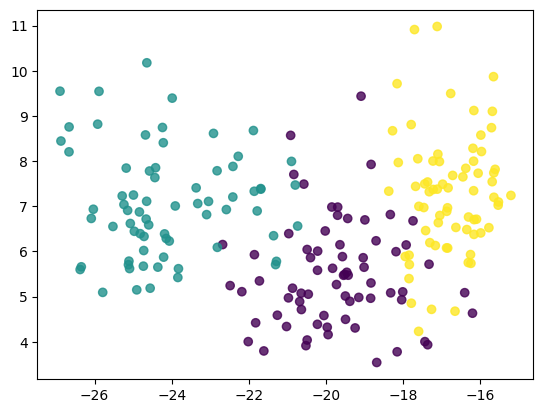

In [22]:
pca = PCA(n_components=2)
transformed_x = pca.fit_transform(X)
plt.scatter(transformed_x[:,0], transformed_x[:,1], c=y, alpha=0.8, cmap='viridis')

In [23]:
kmeans_pca_df = pd.DataFrame(
    np.hstack((transformed_x,
               labels.reshape(-1, 1)
               )), columns=['pca1', 'pca2', 'class'])

truth_pca_df = pd.DataFrame(
    np.hstack((transformed_x,
               df_for_kmeans['class'].values.reshape(-1, 1)
               )), columns=['pca1', 'pca2', 'class'])

[]

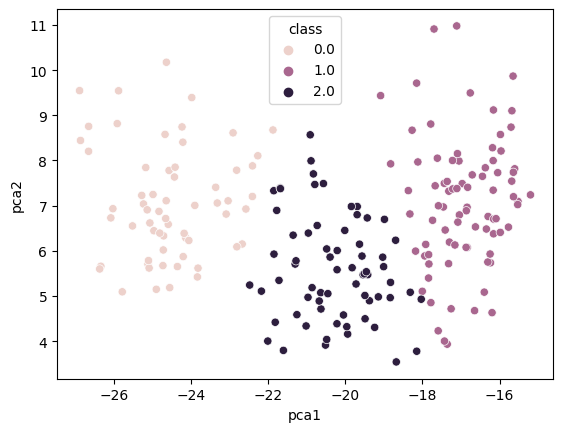

In [24]:
sns.scatterplot(x='pca1', y='pca2', hue='class', data=kmeans_pca_df)
plt.plot()

[]

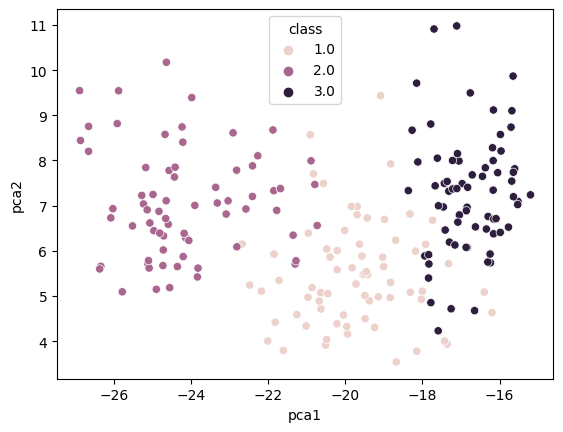

In [25]:
sns.scatterplot(x='pca1', y='pca2', hue='class', data=truth_pca_df)
plt.plot()

In [26]:
perceptron_m = Perceptron(lr=0.01, n_iters=3500)
perceptron_m.fit(X_train, y_train)
y_pred = perceptron_m.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.76      0.61      1336
           1       0.82      0.62      0.71      2468

    accuracy                           0.67      3804
   macro avg       0.67      0.69      0.66      3804
weighted avg       0.72      0.67      0.67      3804

